# Advertising Data Set: Exploration

Continuing previous discussions, we take a step back to take a closer look by exploring the data further.

Recall that:
- Advertising and sales data from 200 different markets.
- Sales are in units of 1000.
- Budgets are in units of 1000$.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

COLORS = {'TV': '#1b9e77',
          'radio': '#d95f02',
          'newspaper': '#7570b3', 
          'total': '#c51b8a'}

In [2]:
platform_names = ['TV', 'radio', 'newspaper']
total_name = 'total'
sales_name = 'sales'

# Looking at some tables...

In [3]:
# read in the data
df = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
df['total'] = df[platform_names].sum(axis=1)
df = df[platform_names + [total_name, sales_name]]  # reorder for later
df.head(3)

,TV,radio,newspaper,total,sales
1,230.1,37.8,69.2,337.1,22.1
2,44.5,39.3,45.1,128.9,10.4
3,17.2,45.9,69.3,132.4,9.3


In [4]:
df.corr(method='pearson').round(2)

,TV,radio,newspaper,total,sales
TV,1.00,0.05,0.06,0.95,0.78
radio,0.05,1.00,0.35,0.29,0.58
newspaper,0.06,0.35,1.00,0.34,0.23
total,0.95,0.29,0.34,1.00,0.87
sales,0.78,0.58,0.23,0.87,1.00


In [5]:
df.corr(method='spearman').round(2)

,TV,radio,newspaper,total,sales
TV,1.00,0.06,0.05,0.95,0.80
radio,0.06,1.00,0.32,0.28,0.55
newspaper,0.05,0.32,1.00,0.31,0.19
total,0.95,0.28,0.31,1.00,0.88
sales,0.80,0.55,0.19,0.88,1.00


# Looking at some figures...

<ipython-input-6-4dc9fd4ebee2>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  _ = pd.plotting.scatter_matrix(df, ax=ax)


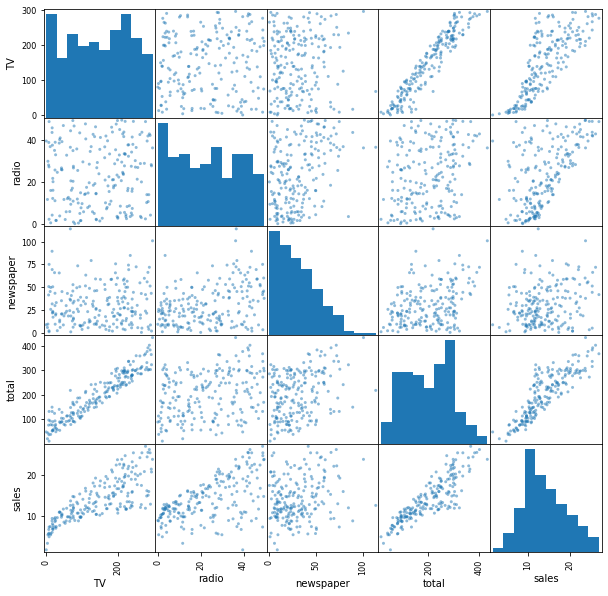

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
_ = pd.plotting.scatter_matrix(df, ax=ax)

<AxesSubplot:>

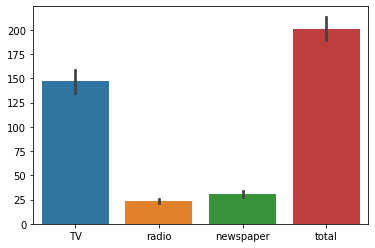

In [7]:
sns.barplot(data=df[platform_names + [total_name]])

(0.0, 30.0)

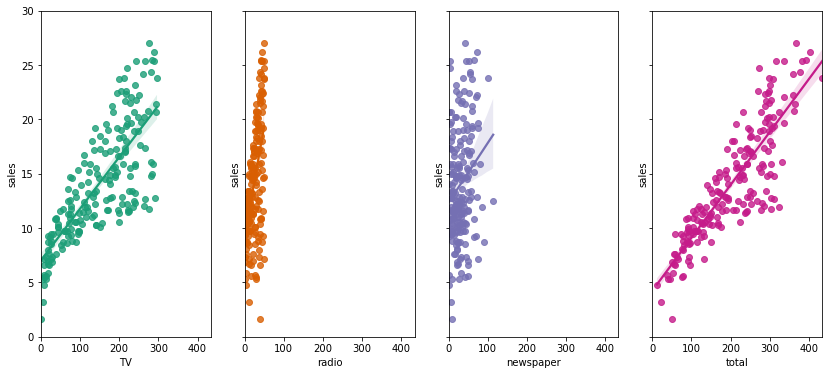

In [8]:
xnames = platform_names + [total_name]
yname = sales_name

fig, axs = plt.subplots(figsize=(14, 6), ncols=len(xnames), sharey=True, sharex=True)
for xname, ax in zip(xnames, axs):
    sns.regplot(xname, yname, data=df, ax=ax, color=COLORS[xname])
    
axs[0].set_ylim(0, 30)

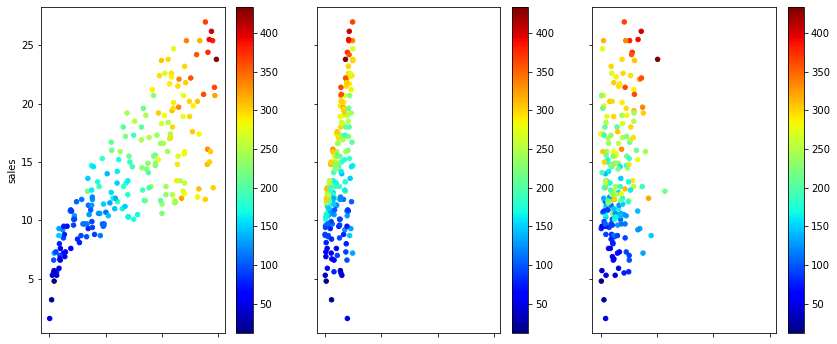

In [9]:
xnames = platform_names
yname = sales_name

fig, axs = plt.subplots(figsize=(14, 6), ncols=len(xnames), sharey=True, sharex=True)
for xname, ax in zip(platform_names, axs):
    df.plot.scatter(ax=ax, x=xname, y=yname, c=df[total_name], cmap='jet')

## Looking at some tables...

In [10]:
df_spending_ratios = df[platform_names].apply(lambda x: x / x.sum(), axis=1)
df_spending_ratios[total_name] = df[total_name].rank(ascending=False)
df_spending_ratios[sales_name] = df[sales_name].rank(ascending=False)
df_spending_ratios.head()

,TV,radio,newspaper,total,sales
1,0.682587,0.112133,0.205280,11.0,19.0
2,0.345229,0.304888,0.349884,144.0,149.5
3,0.129909,0.346677,0.523414,142.0,168.5
4,0.602865,0.164345,0.232789,64.5,43.0
5,0.723200,0.043200,0.233600,67.0,100.5


In [11]:
df_spending_ratios.sort_values(by='TV', ascending=False).round(3).head(10)

,TV,radio,newspaper,total,sales
36,0.958,0.014,0.028,26.0,103.5
97,0.955,0.017,0.029,101.0,124.5
170,0.944,0.035,0.021,29.0,76.5
189,0.942,0.046,0.012,25.0,65.5
147,0.938,0.029,0.034,63.0,97.0
181,0.935,0.016,0.050,122.0,147.5
175,0.931,0.014,0.055,79.0,130.5
200,0.931,0.034,0.035,69.0,93.0
34,0.929,0.070,0.001,47.0,50.5
146,0.928,0.013,0.060,130.0,151.5


In [12]:
df_spending_ratios.sort_values(by='radio', ascending=False).round(3).head(10)

,TV,radio,newspaper,total,sales
131,0.014,0.808,0.178,195.0,200.0
133,0.223,0.721,0.056,198.0,193.0
79,0.121,0.669,0.210,196.0,196.5
156,0.192,0.542,0.266,199.0,199.0
137,0.346,0.528,0.126,185.0,165.0
167,0.232,0.488,0.280,182.0,180.0
191,0.457,0.476,0.067,177.0,141.5
136,0.465,0.453,0.082,162.0,128.0
149,0.421,0.447,0.132,174.0,139.5
67,0.540,0.422,0.038,188.0,165.0


In [13]:
df_spending_ratios.sort_values(by='newspaper', ascending=False).round(3).head(10)

,TV,radio,newspaper,total,sales
109,0.335,0.010,0.655,197.0,196.5
23,0.168,0.202,0.630,181.0,194.0
193,0.325,0.078,0.597,193.0,192.0
76,0.113,0.291,0.596,131.0,174.0
6,0.066,0.369,0.566,141.0,185.5
122,0.207,0.239,0.554,173.0,187.0
57,0.095,0.366,0.539,184.0,195.0
13,0.191,0.281,0.528,150.0,170.0
3,0.130,0.347,0.523,142.0,168.5
92,0.453,0.024,0.523,187.0,183.5


In [14]:
df_spending_ratios.sort_values(by='total').round(3).head(10)

,TV,radio,newspaper,total,sales
102,0.684,0.084,0.233,1.0,10.5
184,0.715,0.107,0.178,2.0,2.0
199,0.724,0.107,0.169,3.0,3.0
99,0.756,0.110,0.134,4.0,5.0
18,0.747,0.105,0.148,5.0,8.0
176,0.753,0.133,0.114,6.0,1.0
31,0.804,0.078,0.119,7.0,23.0
138,0.755,0.080,0.165,8.0,25.0
94,0.698,0.101,0.201,9.0,18.0
62,0.728,0.119,0.152,10.0,9.0
